In [ ]:
import pandas as pd
import numpy as np
import pickle
import joblib

# Libraries for modeling & evaluation
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# 03 Ganjar

In [ ]:
df_ganjar = pd.read_excel('Data Labelling Ganjar_2.xlsx')
df_ganjar

,Clean,Tokenized 2,Polarity Score,polarity
0,ganjar pantau ikn mana ganjar tuntas ikn ikn u...,"['ganjar', 'pantau', 'ikn', 'mana', 'ganjar', ...",13,Positif
1,jago tempat istana presiden diiknpak ganjar ma...,"['jago', 'tempat', 'istana', 'presiden', 'diik...",5,Positif
2,ganjar caricari celah hukum lanjutgan ganjarsa...,"['ganjar', 'caricari', 'celah', 'hukum', 'lanj...",-1,Negatif
3,ganjarmahfud janji kosong realisasi konkrit pi...,"['ganjarmahfud', 'janji', 'kosong', 'realisasi...",-9,Negatif
4,warga jatim dukung ganjarmahfud bicara adil amal,"['warga', 'jatim', 'dukung', 'ganjarmahfud', '...",9,Positif
...,...,...,...,...
1602,hasil jatim bukti ganjar pimpin ubah proses pr...,"['hasil', 'jatim', 'bukti', 'ganjar', 'pimpin'...",3,Positif
1603,proses jalan ganjar bukti sukses jalan tuju,"['proses', 'jalan', 'ganjar', 'bukti', 'sukses...",2,Positif
1604,ganjar pranowo pimpin gandeng capai solusi adil,"['ganjar', 'pranowo', 'pimpin', 'gandeng', 'ca...",5,Positif
1605,dukung ganjarmahfud ekspresi warga jatim ubah ...,"['dukung', 'ganjarmahfud', 'ekspresi', 'warga'...",8,Positif


In [ ]:
df_ganjar['Clean'] = df_ganjar['Clean'].fillna('')  # Fill NaN values with an empty string

In [ ]:
X = df_ganjar['Clean']
y = df_ganjar['polarity']

In [ ]:
X

0       ganjar pantau ikn mana ganjar tuntas ikn ikn u...
1       jago tempat istana presiden diiknpak ganjar ma...
2       ganjar caricari celah hukum lanjutgan ganjarsa...
3       ganjarmahfud janji kosong realisasi konkrit pi...
4        warga jatim dukung ganjarmahfud bicara adil amal
                              ...                        
1602    hasil jatim bukti ganjar pimpin ubah proses pr...
1603          proses jalan ganjar bukti sukses jalan tuju
1604      ganjar pranowo pimpin gandeng capai solusi adil
1605    dukung ganjarmahfud ekspresi warga jatim ubah ...
1606    ganjar pimpin visi rancang program ktp sakti l...
Name: Clean, Length: 1607, dtype: object

In [ ]:
y

0       Positif
1       Positif
2       Negatif
3       Negatif
4       Positif
         ...   
1602    Positif
1603    Positif
1604    Positif
1605    Positif
1606    Positif
Name: polarity, Length: 1607, dtype: object

In [ ]:
y.value_counts()

polarity
Positif    1301
Negatif     306
Name: count, dtype: int64

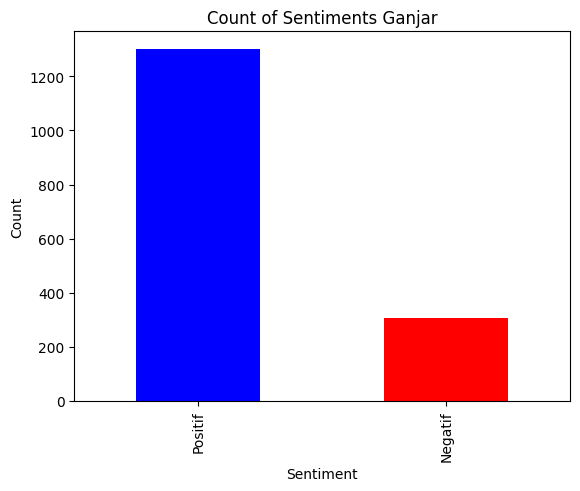

In [ ]:
import matplotlib.pyplot as plt

# Contoh data
data = y.value_counts()

# Membuat diagram batang
data.plot(kind='bar', color=['blue','red'])

# Menambahkan judul dan label
plt.title('Count of Sentiments Ganjar')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Menampilkan diagram batang
plt.show()

# Feature Extraction (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
response = tf_idf.fit_transform(X)
print(response)

  (0, 781)	0.32496365447106174
  (0, 186)	0.38268054102274246
  (0, 1025)	0.20577570078934695
  (0, 416)	0.1492806407991645
  (0, 1221)	0.4039821265654595
  (0, 1202)	0.17750923286735854
  (0, 684)	0.38268054102274246
  (0, 409)	0.4001998807912106
  (0, 817)	0.4039821265654595
  (0, 313)	0.13714551417374007
  (1, 667)	0.19739715221080653
  (1, 251)	0.4897190114831054
  (1, 901)	0.3194134614390304
  (1, 443)	0.46389660319071313
  (1, 1144)	0.44557531293737335
  (1, 456)	0.44557531293737335
  (1, 313)	0.08312591227921992
  (2, 600)	0.16464071353977802
  (2, 318)	0.16464071353977802
  (2, 628)	0.16464071353977802
  (2, 395)	0.4856324897782644
  (2, 194)	0.5801482380547591
  (2, 190)	0.5801482380547591
  (2, 313)	0.09847555519528287
  (3, 1125)	0.39230730954206705
  :	:
  (1603, 313)	0.10649047757601504
  (1604, 312)	0.6429869570115848
  (1604, 1074)	0.386443286573651
  (1604, 184)	0.48027433681380594
  (1604, 899)	0.18664682293648702
  (1604, 9)	0.34218781483428434
  (1604, 870)	0.2066988

In [ ]:
#melihat jumlah fitur

print(len(tf_idf.get_feature_names_out()))

1258


In [ ]:
#melihat fitur-fitur apa saja yang ada di dalam corpus

tf_idf.get_feature_names_out()

array(['abai', 'abdi', 'acaraacara', ..., 'yakin', 'yenny', 'zaman'],
      dtype=object)

In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

#df_tf_idf = pd.DataFrame(X_tf_idf.T,
 #                index=tf_idf.get_feature_names_out(),
  #               columns=[f'D{i+1}' for i in range (len(X))])
#df_tf_idf

,abai,abdi,acaraacara,aceh,acung,adalahhh,adaptif,adat,adem,adil,...,warna,washington,wejang,wni,worklife,wowo,wujud,yakin,yenny,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.342188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle_ganjar', 'wb') as output:
  pickle.dump(X_tf_idf, output)

# Chi Square

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Tentukan nilai taraf nyata (𝛼)
alpha = 0.01

# Hitung nilai chi-square dan p-value untuk setiap fitur
chi2_values, p_values = chi2(X_tf_idf, y)

# Pilih fitur dengan nilai p-value kurang dari sama dengan nilai taraf (alpha) 0.5
selected_feature_indices = np.where(p_values <= alpha)[0]

#Membuat dataframe fitur terpilih dengan p-value <= 0.5 (FITUR TERPILIH)
feature_names = tf_idf.get_feature_names_out()
selected_df = pd.DataFrame({'Fitur': feature_names[selected_feature_indices],
                            'Chi-Square': chi2_values[selected_feature_indices],
                            'P-Value': p_values[selected_feature_indices]})
selected_df = selected_df.sort_values(by='P-Value')
selected_df

#Menampilkan Dataframe dengan 1212 fitur yang memiliki p-value <= 0.5
selected_df

,Fitur,Chi-Square,P-Value
21,arah,20.125171,0.000007
240,pilih,16.104777,0.000060
299,serius,13.869484,0.000196
344,tuntas,13.436048,0.000247
50,bukti,13.284260,0.000268
...,...,...,...
189,level,0.738025,0.390294
112,hijau,0.729809,0.392945
201,mari,0.725204,0.394442
153,kartu,0.719786,0.396214


In [ ]:
# Pilih fitur dengan nilai p-value lebih dari sama dengan nilai taraf (alpha) 0.3 (FITUR TERBUANG)
nonselected_feature_indices = np.where(p_values > alpha)[0]
nonselected_df = pd.DataFrame({'Fitur': feature_names[nonselected_feature_indices],
                               'ChiSquare': chi2_values[nonselected_feature_indices],
                               'PValue': p_values[nonselected_feature_indices]})
nonselected_df = nonselected_df.sort_values(by='PValue')
nonselected_df

,Fitur,ChiSquare,PValue
690,responsif,7.070822e-01,0.400414
854,tuju,7.035778e-01,0.401584
671,ramah,7.018842e-01,0.402151
324,jalan,7.002736e-01,0.402692
155,dalam,6.957444e-01,0.404217
...,...,...,...
443,lapang,2.657784e-05,0.995887
777,suara,2.562514e-05,0.995961
142,cinta,1.853336e-05,0.996565
277,hormat,1.677226e-05,0.996732


In [ ]:
# Menyimpan DataFrame dengan fitur yang memiliki p-value <= 0.5
with open('selected_features_df.pickle_ganjar', 'wb') as output:
    pickle.dump(selected_df, output)

# Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC                           # Import SVM dari scikit-learn
from sklearn.model_selection import train_test_split  # Import fungsi untuk membagi data
from sklearn.metrics import accuracy_score             # Import metrik evaluasi
from joblib import dump

In [ ]:
# Mengambil hanya fitur yang terpilih
selected_features = selected_df['Fitur'].values

In [ ]:
# Mengambil hanya fitur yang terpilih yang ada dalam data_tf_idf_no_duplicates
X_selected = data_tf_idf[selected_features].values

In [ ]:
print(selected_features)

['arah' 'pilih' 'serius' 'tuntas' 'bukti' 'butuh' 'atas' 'jilat' 'tantang'
 'lanjut' 'inspirasi' 'dukung' 'tim' 'ladang' 'kritik' 'manipulasi'
 'dekat' 'muda' 'bijak' 'generasi' 'pisah' 'pribadi' 'ganjarmahfud'
 'recordnya' 'kejar' 'komitmen' 'singkat' 'antitesa' 'jamin' 'prioritas'
 'tinggal' 'rasional' 'jkw' 'ambil' 'langgar' 'usia' 'sempurna' 'usaha'
 'latih' 'tandem' 'wujud' 'solutif' 'kosong' 'jembatan' 'bawaslu' 'anis'
 'tarung' 'roky' 'ikn' 'kompleks' 'kompleksitas' 'makan' 'asam' 'sulfat'
 'desa' 'erat' 'manifestasi' 'naluri' 'bagus' 'timpang' 'enjoyy' 'cerdas'
 'data' 'langkah' 'kayak' 'sukses' 'nurani' 'hasil' 'semangat' 'cabut'
 'ganjar' 'pemimpinpemimpin' 'ham' 'kontribusi' 'pihak' 'masalah' 'tolol'
 'hindar' 'mending' 'kamus' 'batal' 'ungkap' 'benar' 'konsistensi'
 'pasang' 'track' 'habis' 'haram' 'jeblok' 'buzzerrp' 'berani'
 'degdegannya' 'setia' 'berkatakata' 'rata' 'inovasi' 'upaya' 'hadap'
 'tegak' 'bersih' 'caricari' 'celah' 'banget' 'prabowo' 'rangkul' 'isuisu'
 'ba

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tentukan parameter grid
parameters = [
    {'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10, 100, 1000]}
]

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi objek GridSearchCV dengan penambahan parameter scoring='accuracy'
grid_search = GridSearchCV(svm_model, parameters, scoring='accuracy', verbose=3)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.810 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.810 total time=   0.2s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.810 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.810 total time=   0.2s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.810 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.810 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.810 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.810 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.810 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.810 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [ ]:
best_params = {}
for kernel in ['rbf', 'linear', 'poly']:
    best_params[kernel] = grid_search.cv_results_['params'][np.where(grid_search.cv_results_['param_kernel'] == kernel)[0][grid_search.cv_results_['rank_test_score'][grid_search.cv_results_['param_kernel'] == kernel].argmin()]]

for kernel, params in best_params.items():
    print(f"Best parameters for '{kernel}' kernel:", params)

Best parameters for 'rbf' kernel: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best parameters for 'linear' kernel: {'C': 1000, 'kernel': 'linear'}
Best parameters for 'poly' kernel: {'C': 1, 'degree': 2, 'kernel': 'poly'}


In [ ]:
grid_search.best_params_

{'C': 1, 'degree': 2, 'kernel': 'poly'}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# model_svm = SVC(C=10, kernel='linear')
model_svm = SVC(C=1, degree=2, kernel='poly')
# model_svm = SVC(C=10, gamma=1, kernel='rbf')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.8467908902691511


In [ ]:
model_pred = model_svm.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

In [ ]:
model_svm

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array(['Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Positif', 'Negatif',
       'Negatif', 'Positif', 'Positif', 'Negatif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Negatif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Negatif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Positif', 

In [ ]:
# Jumlah total dataset
total_data_train = len(y_train)
total_data_test = len(y_test)

print("Jumlah Total Dataset (Data Latih):", total_data_train)
print("Jumlah Total Dataset (Data Uji):", total_data_test)

# Jumlah data positif dan negatif dari data latih
print("\nData Latih:")
print("Jumlah Data Positif:", y_train[y_train == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_train[y_train == 'Negatif'].shape[0])

# Jumlah data positif dan negatif dari data uji
print("\nData Uji:")
print("Jumlah Data Positif:", y_test[y_test == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_test[y_test == 'Negatif'].shape[0])

Jumlah Total Dataset (Data Latih): 1124
Jumlah Total Dataset (Data Uji): 483

Data Latih:
Jumlah Data Positif: 895
Jumlah Data Negatif: 229

Data Uji:
Jumlah Data Positif: 406
Jumlah Data Negatif: 77


# Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 409
Jumlah prediksi salah	: 74
Akurasi pengujian	: 84.67908902691511 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[ 17  60]
 [ 14 392]]


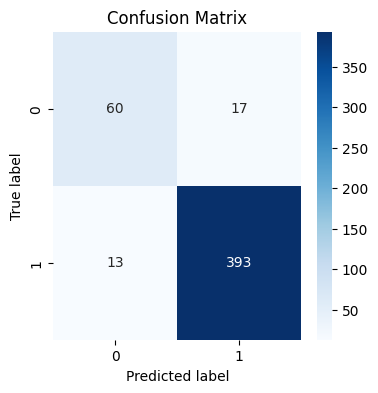

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, model_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

     Negatif       0.82      0.78      0.80        77
     Positif       0.96      0.97      0.96       406

    accuracy                           0.94       483
   macro avg       0.89      0.87      0.88       483
weighted avg       0.94      0.94      0.94       483



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Mendapatkan laporan klasifikasi dalam bentuk kamus
report_dict = classification_report(y_test, model_pred, output_dict=True)

# Membuat DataFrame dari kamus laporan klasifikasi
df_report = pd.DataFrame(report_dict)

# Menampilkan DataFrame
df_report

,Negatif,Positif,accuracy,macro avg,weighted avg
precision,0.821918,0.958537,0.937888,0.890227,0.936757
recall,0.779221,0.967980,0.937888,0.873601,0.937888
f1-score,0.800000,0.963235,0.937888,0.881618,0.937212
support,77.000000,406.000000,0.937888,483.000000,483.000000


In [ ]:
from sklearn.metrics import classification_report

# Mendapatkan laporan klasifikasi dalam bentuk kamus
report_dict = classification_report(y_test, model_pred, output_dict=True)

# Menampilkan laporan klasifikasi dalam bentuk kamus
print('Classification report:\n', report_dict)

Classification report:
 {'Negatif': {'precision': 0.821917808219178, 'recall': 0.7792207792207793, 'f1-score': 0.7999999999999999, 'support': 77}, 'Positif': {'precision': 0.9585365853658536, 'recall': 0.9679802955665024, 'f1-score': 0.9632352941176471, 'support': 406}, 'accuracy': 0.937888198757764, 'macro avg': {'precision': 0.8902271967925158, 'recall': 0.8736005373936409, 'f1-score': 0.8816176470588235, 'support': 483}, 'weighted avg': {'precision': 0.9367567803134851, 'recall': 0.937888198757764, 'f1-score': 0.9372122762148337, 'support': 483}}


In [ ]:
selected_df

,Fitur,Chi-Square,P-Value
21,arah,20.125171,0.000007
240,pilih,16.104777,0.000060
299,serius,13.869484,0.000196
344,tuntas,13.436048,0.000247
50,bukti,13.284260,0.000268
...,...,...,...
189,level,0.738025,0.390294
112,hijau,0.729809,0.392945
201,mari,0.725204,0.394442
153,kartu,0.719786,0.396214


In [ ]:
selected_df['Fitur']

21          arah
240        pilih
299       serius
344       tuntas
50         bukti
         ...    
189        level
112        hijau
201         mari
153        kartu
194    mahasiswa
Name: Fitur, Length: 366, dtype: object

In [ ]:
selected_df['Fitur'].to_csv("hasil_ganjar.csv")

In [ ]:
data.to_csv("hasil_ganjar.csv")

# EXport Model

In [ ]:
joblib.dump(model, 'svm_ganjar_2.pkl')

['svm_ganjar_2.pkl']

In [ ]:
joblib.dump(tf_idf,'tfidf_ganjar_2.pkl')

['tfidf_ganjar_2.pkl']